In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to include a channel dimension (for CNNs)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"Normalized and reshaped training data shape: {x_train.shape}")
print(f"Normalized and reshaped testing data shape: {x_test.shape}")

# Task
Implement a minimalistic Python solution for handwritten digit recognition using efficient libraries for image metadata handling, preprocessing, and model training/evaluation.

## Load and inspect data

### Subtask:
Load the dataset (e.g., MNIST) and inspect its structure, including image metadata if available.


**Reasoning**:
Load the MNIST dataset and display the shapes of the training and testing sets, then display the first few images and their labels.



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


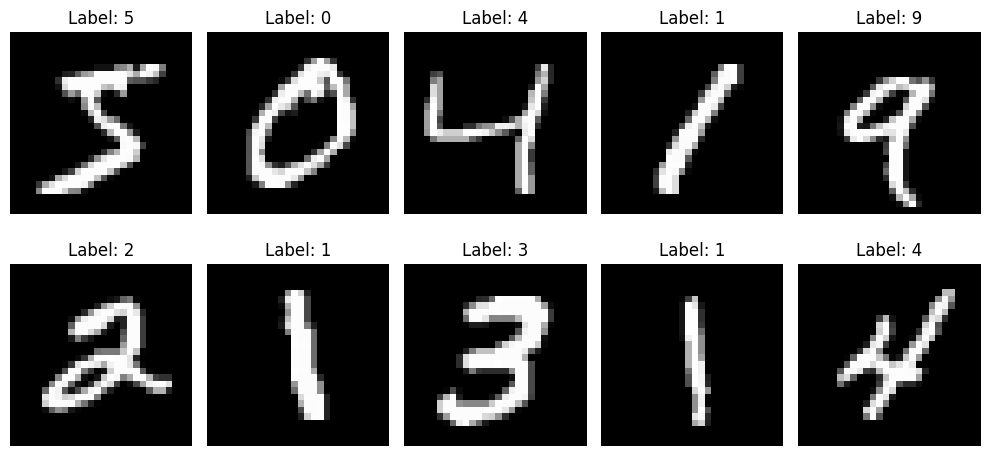

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Display the first few images and labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Build and train a model

### Subtask:
Define and train a suitable machine learning model (e.g., a convolutional neural network) for handwritten digit recognition.


**Reasoning**:
Import the necessary Keras layers for building a CNN and define, compile, and train the model as instructed.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9059 - loss: 0.7985 - val_accuracy: 0.9780 - val_loss: 0.0715


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.0715
Test accuracy: 0.9780


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


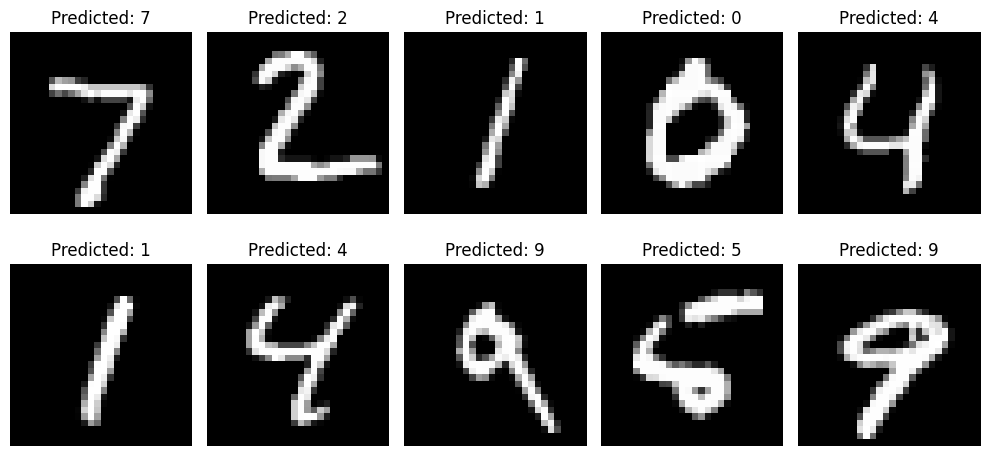

In [ ]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)

# Get the predicted class for the first few test images
predicted_classes = np.argmax(predictions, axis=1)

# Display the first few test images and their predicted labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()